In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Add the root directory of the package to sys.path
sys.path.append('/Users/user/PythonProjects/SpyDust/')

import SpyDust.main.Grain as spyGrain
from SpyDust.utils.util import cgsconst

import SpyDust
import SpyDust.SPDUST_as_is.spdust as spdust
import SpyDust.SPDUST_as_is.grain_properties as spdust_grain

l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Maximum energy in the Qabs_hnu_tab is 1239.84 eV.
FIR_integral_charged shape: (30, 30)
Na: 30, Nchi: 30
Tev table already exists at /Users/user/PythonProjects/SpyDust/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
Gaunt factor stored


Environment parameters

In [2]:
DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

In [3]:
# Perturbed CNM
CNM_perturbed_nh = {'nh' : 31, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_T = {'nh' : 30, 'T': 101., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_Chi = {'nh' : 30, 'T': 100., 'Chi': 1.1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_xh = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.3e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_xC = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3.1e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_y = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0.02, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_gamma = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0.02, 'dipole': 9.3, 'line':7}
CNM_perturbed_dipole = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.4, 'line':7}

In [4]:
from SpyDust.main.SpyDust import SpyDust


min_freq=1 # in GHz
max_freq=300 # in GHz
n_freq=500

spy_SED = SpyDust(CNM_params, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
spy_SED_perturbed_nh = SpyDust(CNM_perturbed_nh, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
spy_SED_perturbed_T = SpyDust(CNM_perturbed_T, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
spy_SED_perturbed_Chi = SpyDust(CNM_perturbed_Chi, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
spy_SED_perturbed_xh = SpyDust(CNM_perturbed_xh, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
spy_SED_perturbed_xC = SpyDust(CNM_perturbed_xC, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
spy_SED_perturbed_y = SpyDust(CNM_perturbed_y, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
spy_SED_perturbed_gamma = SpyDust(CNM_perturbed_gamma, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
spy_SED_perturbed_dipole = SpyDust(CNM_perturbed_dipole, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)

spy_deri_SED_nh = (spy_SED_perturbed_nh[1,:]-spy_SED[1,:])/(CNM_perturbed_nh['nh']-CNM_params['nh'])
spy_deri_SED_T = (spy_SED_perturbed_T[1,:]-spy_SED[1,:])/(CNM_perturbed_T['T']-CNM_params['T'])
spy_deri_SED_Chi = (spy_SED_perturbed_Chi[1,:]-spy_SED[1,:])/(CNM_perturbed_Chi['Chi']-CNM_params['Chi'])
spy_deri_SED_xh = (spy_SED_perturbed_xh[1,:]-spy_SED[1,:])/(CNM_perturbed_xh['xh']-CNM_params['xh'])
spy_deri_SED_xC = (spy_SED_perturbed_xC[1,:]-spy_SED[1,:])/(CNM_perturbed_xC['xC']-CNM_params['xC'])
spy_deri_SED_y = (spy_SED_perturbed_y[1,:]-spy_SED[1,:])/(CNM_perturbed_y['y']-CNM_params['y'])
spy_deri_SED_gamma = (spy_SED_perturbed_gamma[1,:]-spy_SED[1,:])/(CNM_perturbed_gamma['gamma']-CNM_params['gamma'])
spy_deri_SED_dipole = (spy_SED_perturbed_dipole[1,:]-spy_SED[1,:])/(CNM_perturbed_dipole['dipole']-CNM_params['dipole'])

l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /Users/user/PythonProjects/SpyDust/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored


In [18]:
log_intensity = True

if log_intensity:
    spy_deri_SED_nh = spy_deri_SED_nh/spy_SED[1,:]
    spy_deri_SED_T = spy_deri_SED_T/spy_SED[1,:]
    spy_deri_SED_Chi = spy_deri_SED_Chi/spy_SED[1,:]
    spy_deri_SED_xh = spy_deri_SED_xh/spy_SED[1,:]
    spy_deri_SED_xC = spy_deri_SED_xC/spy_SED[1,:]
    spy_deri_SED_y = spy_deri_SED_y/spy_SED[1,:]
    spy_deri_SED_gamma = spy_deri_SED_gamma/spy_SED[1,:]
    spy_deri_SED_dipole = spy_deri_SED_dipole/spy_SED[1,:]


In [5]:
spy_color1, spy_color2, spdust_color1, spdust_color2=['#9ED17B', '#367DB0', '#A8ACCB', '#AC8AB3']

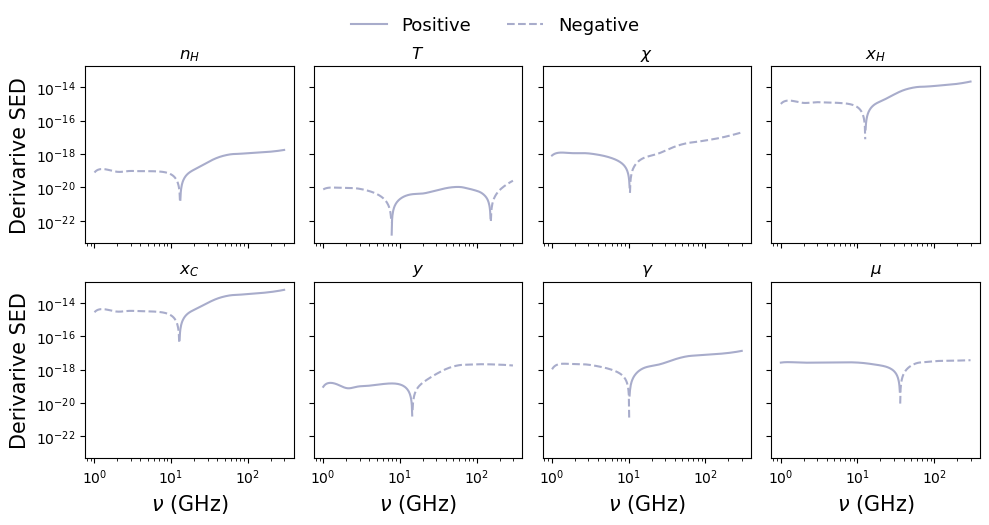

In [19]:
# plot the SED and derivatives
fig, axes = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
freqs = spy_SED[0,:] # in GHz
#plt.plot(freqs, spy_SED[1,:], label='CNM')

axs = axes.flatten()
perturbed_SED_list = [spy_SED_perturbed_nh, spy_SED_perturbed_T, spy_SED_perturbed_Chi, spy_SED_perturbed_xh, 
                      spy_SED_perturbed_xC, spy_SED_perturbed_y, spy_SED_perturbed_gamma, spy_SED_perturbed_dipole]
deri_SED_list = [spy_deri_SED_nh, spy_deri_SED_T, spy_deri_SED_Chi, spy_deri_SED_xh, 
                 spy_deri_SED_xC, spy_deri_SED_y, spy_deri_SED_gamma, spy_deri_SED_dipole]
deri_label_list = [r'$n_H$', r'$T$', r'$\chi$', r'$x_H$', r'$x_C$', r'$y$', r'$\gamma$', r'$\mu$']
colour_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

norm = np.sum(spy_SED[1,:])
spy_SED_normed = spy_SED[1,:]/norm
def plot_derivative_SEDs(ind, colour, label=False, plot_xlabel=False, plot_ylabel=False):
    title = deri_label_list[ind]
    perturbed_SED = perturbed_SED_list[ind][1,:]/norm
    deri_SED = deri_SED_list[ind]/norm
    deri_SED_positiv = np.where(deri_SED > 0, deri_SED, np.nan)
    deri_SED_negativ = np.where(deri_SED < 0, -deri_SED, np.nan)
    #plt.fill_between(freqs, spy_SED_normed, perturbed_SED, color=colour, alpha=0.5)
    if label:
        axs[ind].plot(freqs, deri_SED_positiv, label='Positive', linestyle='-', color=colour)
        axs[ind].plot(freqs, deri_SED_negativ, label='Negative', linestyle='--', color=colour)
    else:
        axs[ind].plot(freqs, deri_SED_positiv, linestyle='-', color=colour)
        axs[ind].plot(freqs, deri_SED_negativ, linestyle='--', color=colour)
    if plot_xlabel:
        axs[ind].set_xlabel(r'$\nu$ (GHz)', fontsize=15)
    if plot_ylabel:
        axs[ind].set_ylabel('Derivarive SED', fontsize=15)
    axs[ind].set_xscale('log')
    axs[ind].set_yscale('log')
    axs[ind].set_title(title)

for i in range(8):
    curve_label = False
    plt_yl = False
    plt_xl = False
    if i == 0:
        curve_label = True
    if i in [0, 4]:
        plt_yl = True
    if i in [4, 5, 6, 7]:
        plt_xl = True
    plot_derivative_SEDs(i, spdust_color1, label=curve_label, plot_xlabel=plt_xl, plot_ylabel=plt_yl)
plt.tight_layout()
fig.legend(loc='upper center', 
           ncol=2,
           bbox_to_anchor=(0.5, 1.06),
           frameon=False,
           fontsize=13
           )
plt.savefig('figures/Derivative_SED_CNM_perturbed.pdf', bbox_inches='tight')

In [20]:
def cov_matrix_of_derivative_SED(deri_SED_list):
    cov_matrix = np.zeros((8, 8))
    for i in range(8):
        norm_i = np.linalg.norm(deri_SED_list[i])
        for j in range(8):
            norm_j = np.linalg.norm(deri_SED_list[j])
            cov_matrix[i,j] = np.sum(deri_SED_list[i]*deri_SED_list[j])/(norm_i*norm_j)
    return cov_matrix
cov_matrix = cov_matrix_of_derivative_SED(deri_SED_list)

In [21]:
import pandas as pd
import seaborn as sns


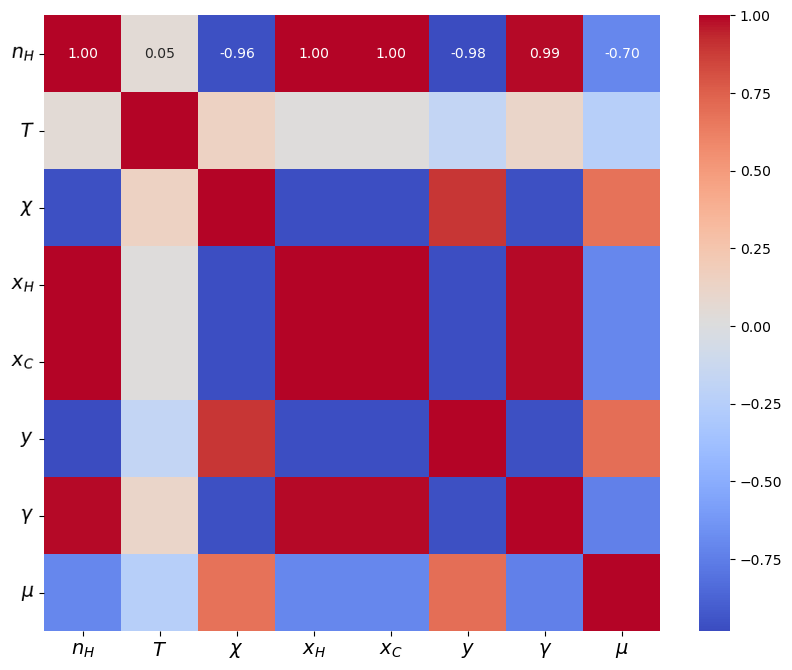

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True)
#plt.title("Covariance Matrix Heatmap", fontsize=15)
#plt.xlabel("Parameters")
# Use the list of parameters as both the x and y ticks
plt.xticks(np.arange(8)+0.5, deri_label_list)
plt.yticks(np.arange(8)+0.5, deri_label_list, rotation=np.pi/2)
# set the font size of the x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylabel("Parameters")
plt.savefig('figures/Covariance_Matrix_CNM_perturbed.pdf', bbox_inches='tight')
plt.show()

/Users/user/anaconda3/envs/TOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/envs/TOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/envs/TOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/envs/TOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

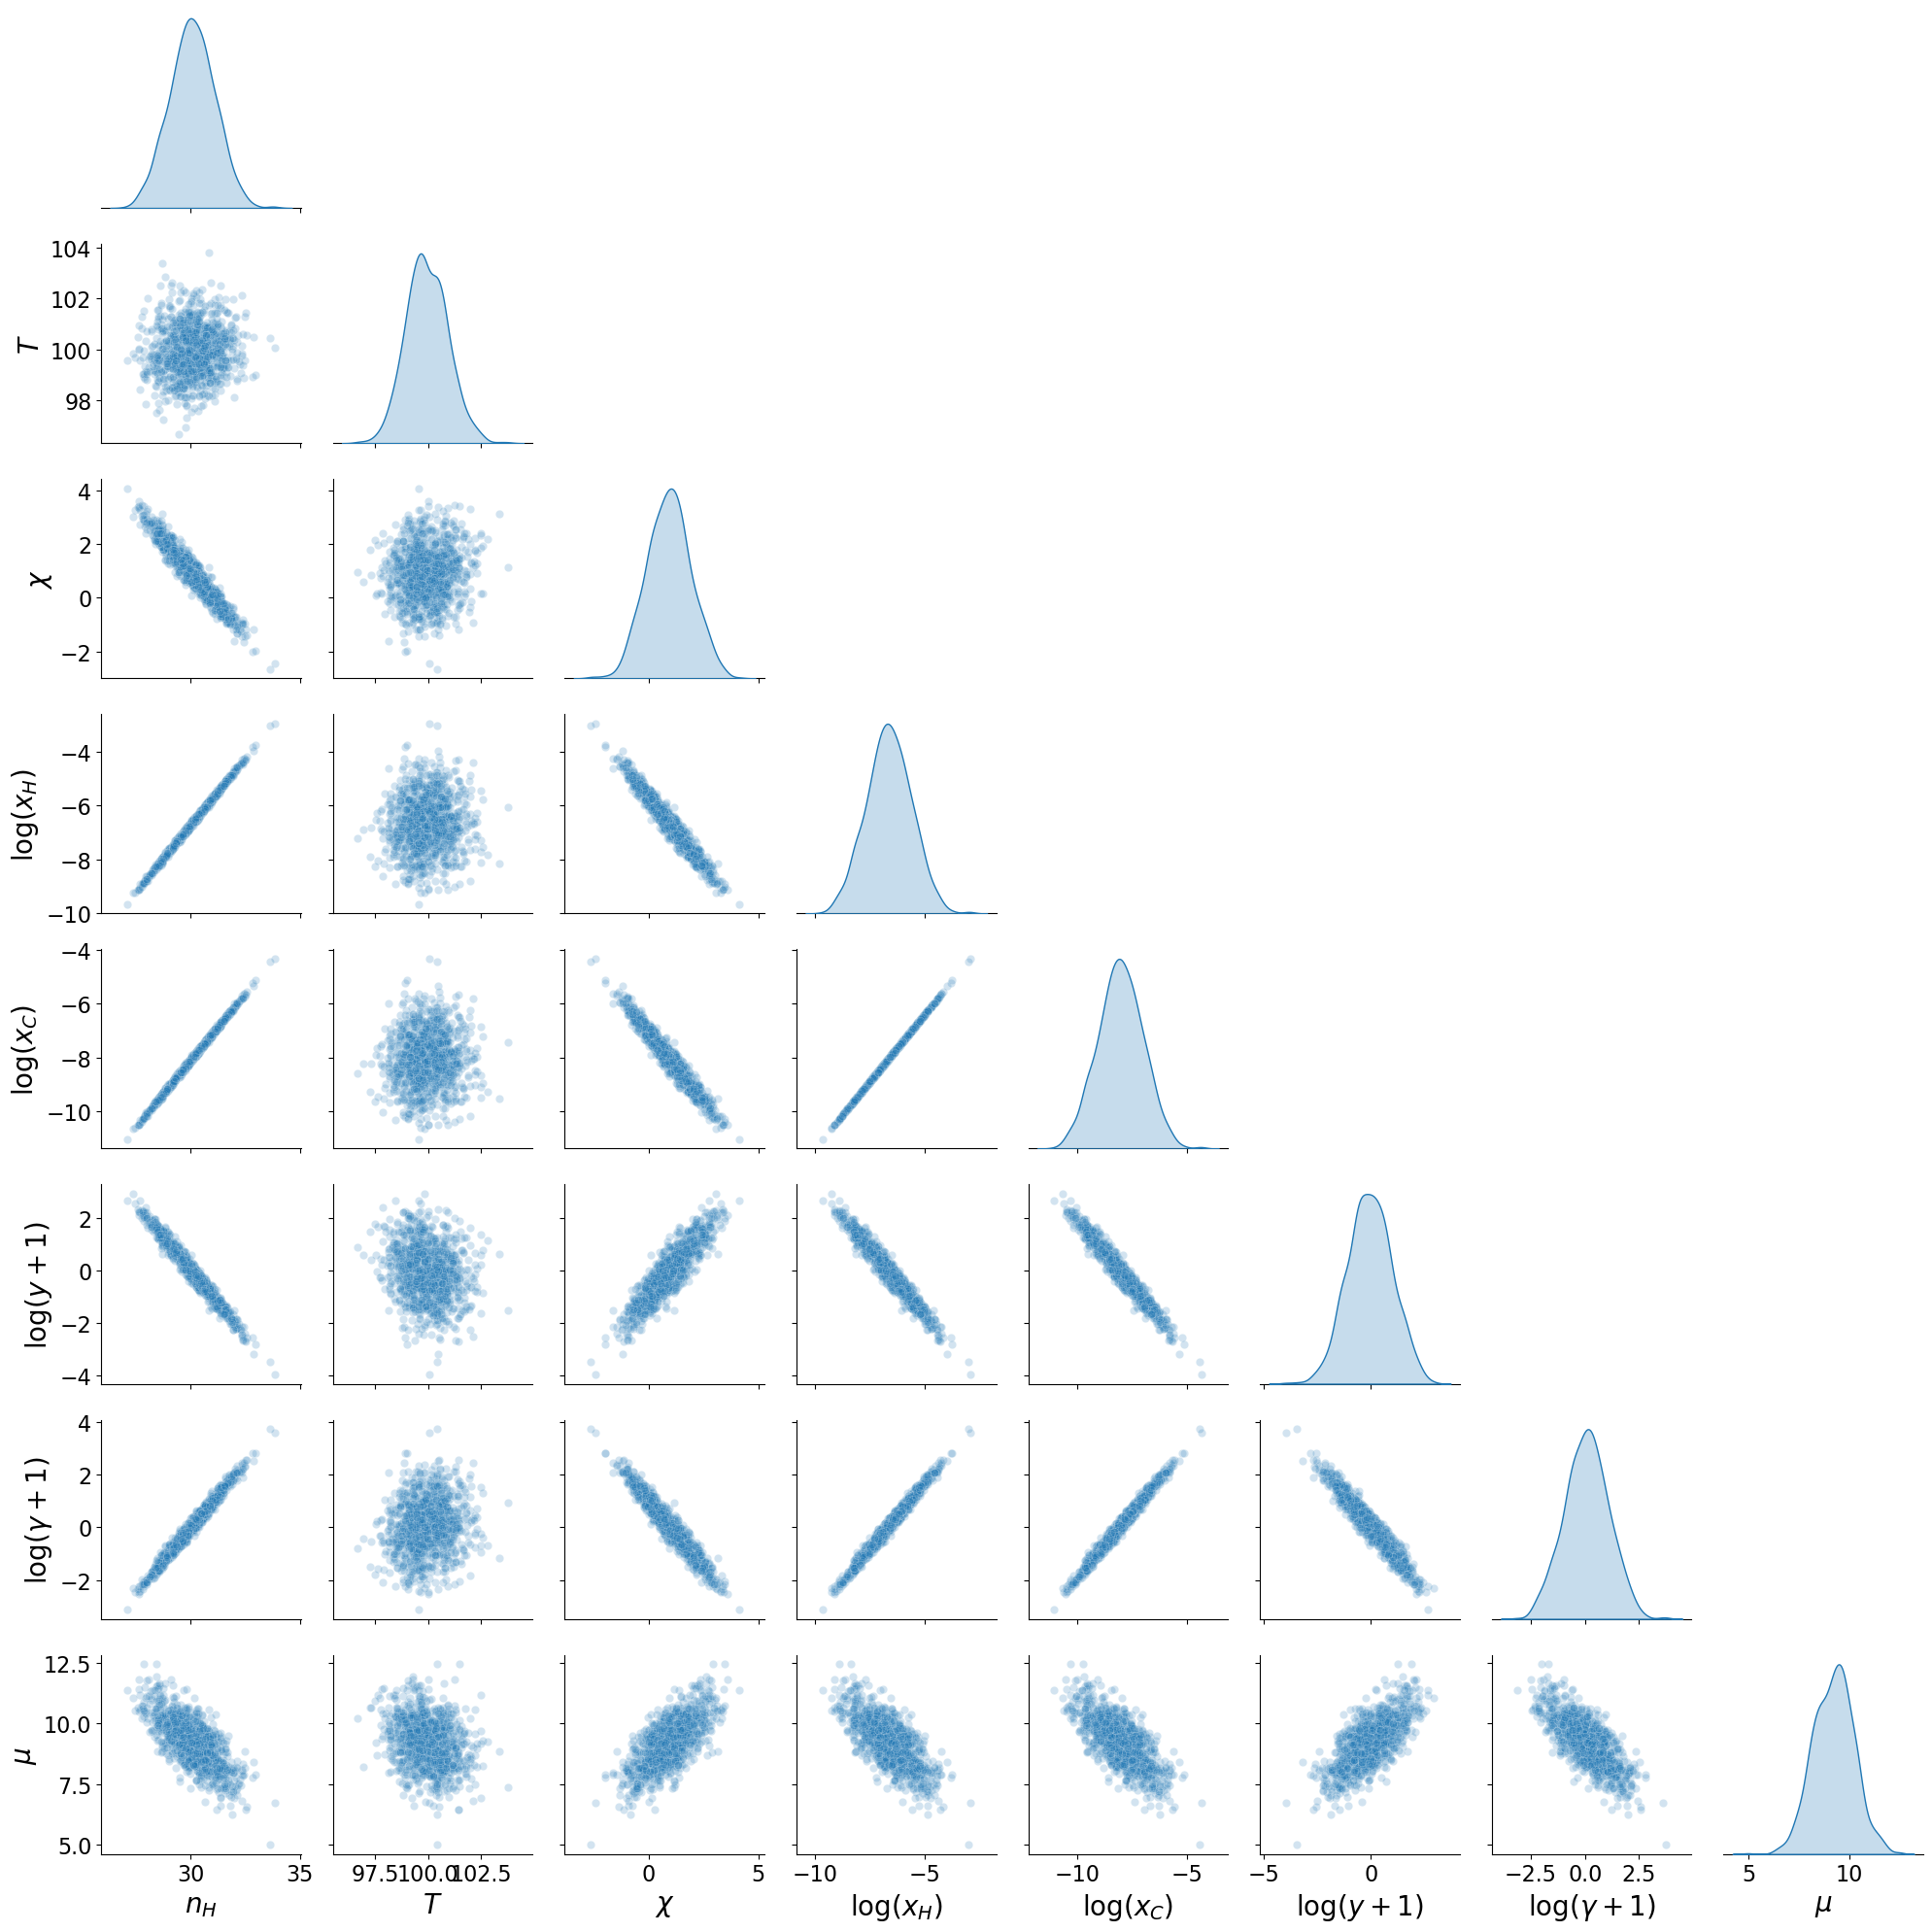

In [23]:

# Generate samples from a multivariate normal distribution for demonstration
mean = np.array([CNM_params['nh'], CNM_params['T'], CNM_params['Chi'], np.log(CNM_params['xh']), np.log(CNM_params['xC']), 
                 np.log(CNM_params['y']+1), np.log(CNM_params['gamma']+1), CNM_params['dipole']])
data = np.random.multivariate_normal(mean, cov_matrix, size=1000)



deri_label_list_transformed = [r'$n_H$', r'$T$', r'$\chi$', r'$\log(x_H)$', r'$\log(x_C)$', r'$\log(y+1)$', r'$\log(\gamma+1)$', r'$\mu$']


df = pd.DataFrame(data, columns=[deri_label_list_transformed[i] for i in range(len(cov_matrix))])

g = sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.2}, diag_kind="kde", corner=True)
#plt.suptitle("Pair Plot with Sampled Data", y=1.02)
# set the fontsize of the parameters
# Set font size and range for each axis

font_size = 20
tick_size = 16
for ax in g.axes.flat:
    if ax is not None:
        ax.tick_params(labelsize=tick_size)
        
        # Set axis limits based on the parameter name
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        
        # Set font size for axis labels
        ax.xaxis.label.set_size(font_size)
        ax.yaxis.label.set_size(font_size)
plt.tight_layout()
plt.savefig('figures/Pair_Plot_CNM_perturbed.pdf', bbox_inches='tight')
plt.show()

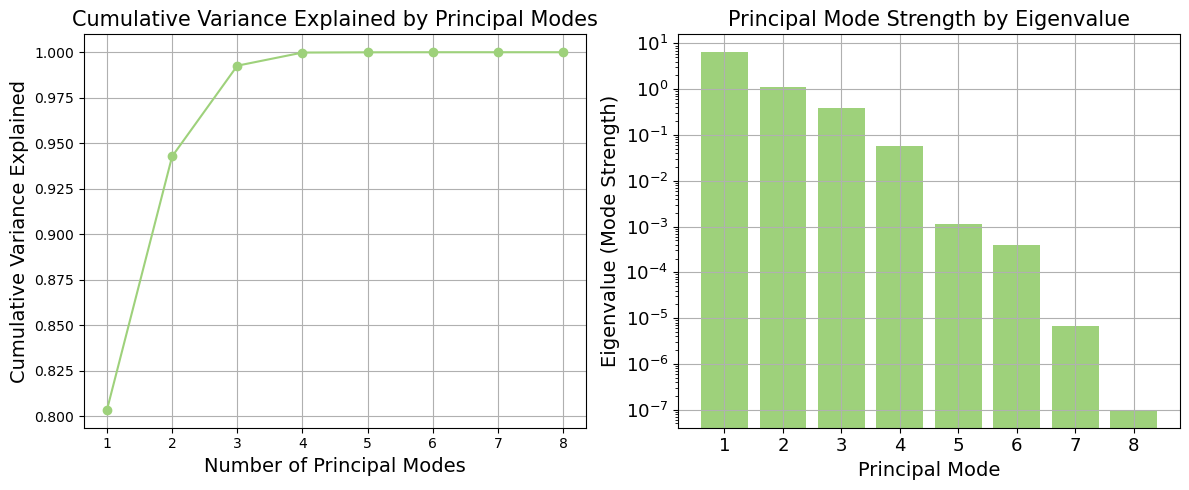

In [24]:
# Eigen decomposition
eigenvalues_unsorted, eigenvectors_unsorted = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues_unsorted)[::-1]
eigenvalues = eigenvalues_unsorted[sorted_indices]
eigenvectors = eigenvectors_unsorted[:, sorted_indices]

# Calculate the cumulative variance explained by each mode
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot cumulative variance
axs[0].plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', color='#9ED17B')
axs[0].set_xlabel("Number of Principal Modes", fontsize=14)
axs[0].set_ylabel("Cumulative Variance Explained", fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=13)
axs[0].set_title("Cumulative Variance Explained by Principal Modes", fontsize=15)
axs[0].grid()

# Plot eigenvalues as mode strength
axs[1].bar(range(1, len(eigenvalues) + 1), np.abs(eigenvalues), color='#9ED17B')
axs[1].set_xlabel("Principal Mode", fontsize=14)
axs[1].set_ylabel("Eigenvalue (Mode Strength)", fontsize=14)
# fontsize for the x and y ticks
axs[1].tick_params(axis='both', which='major', labelsize=13)
axs[1].set_yscale('log')
axs[1].set_title("Principal Mode Strength by Eigenvalue", fontsize=15)
axs[1].grid()

plt.tight_layout()
plt.savefig('figures/Principal_Mode_Strength_CNM_perturbed.pdf', bbox_inches='tight')
plt.show()

In [25]:
sorted_indices

array([7, 6, 5, 4, 3, 2, 1, 0])

In [26]:
# Get the parameters of the two most important modes
# CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

params = np.sum(eigenvectors[:, :1] @ np.diag(np.sqrt(eigenvalues[:1])) , axis=1)
one_mode_env = {'nh' : 30+params[-1], 'T': 100+params[-2], 'Chi': 1+params[-3], 'xh': params[-4], 'xC': params[-5], 'y' : params[-6], 'gamma': params[-7], 'dipole': params[0], 'line':7}


params = np.sum(eigenvectors[:, :2] @ np.diag(np.sqrt(eigenvalues[:2])) , axis=1)
two_modes_env = {'nh' : 30+params[-1], 'T': 100+params[-2], 'Chi': 1+params[-3], 'xh': params[-4], 'xC': params[-5], 'y' : params[-6], 'gamma': params[-7], 'dipole': params[0], 'line':7}

params = np.sum(eigenvectors[:, :3] @ np.diag(np.sqrt(eigenvalues[:3])) , axis=1)
three_modes_env = {'nh' : 30+params[-1], 'T': 100+params[-2], 'Chi': 1+params[-3], 'xh': params[-4], 'xC': params[-5], 'y' : params[-6], 'gamma': params[-7], 'dipole': params[0], 'line':7}

In [ ]:
one_mode_env

{'nh': 29.617118451604313,
 'T': 99.00187160903775,
 'Chi': 1.9835660863804545,
 'xh': -0.9938332940791942,
 'xC': -0.9938869151766289,
 'y': 0.99894505858539,
 'gamma': -0.9866738993094679,
 'dipole': -0.9911222966408918,
 'line': 7}

In [28]:
cumulative_variance

array([0.80361504, 0.94279065, 0.99259594, 0.99980807, 0.99995087,
       0.99999914, 0.99999999, 1.        ])

In [27]:
eigenvalues

array([6.42892035e+00, 1.11340486e+00, 3.98442334e-01, 5.76969747e-02,
       1.14244240e-03, 3.86187261e-04, 6.74827973e-06, 9.89917716e-08])

In [16]:
one_mode_env

{'nh': 29.617118451604313,
 'T': 99.00187160903775,
 'Chi': 1.9835660863804545,
 'xh': -0.9938332940791942,
 'xC': -0.9938869151766289,
 'y': 0.99894505858539,
 'gamma': -0.9866738993094679,
 'dipole': -0.9911222966408918,
 'line': 7}

In [17]:
one_mode_SED = SpyDust(one_mode_env, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
two_modes_SED = SpyDust(two_modes_env, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)
three_modes_SED = SpyDust(three_modes_env, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=True)

/Users/user/PythonProjects/SpyDust/SpyDust/main/AngMomDist.py:275: RuntimeWarning: invalid value encountered in sqrt
  omega_peak_high = omega_peak_th * np.sqrt(2 * G_high / F_high / (1 + np.sqrt(1 + xi_high)))
/Users/user/PythonProjects/SpyDust/SpyDust/core/plasmadrag.py:615: RuntimeWarning: invalid value encountered in cast
  Omega_indices = np.array([np.int64(x) for x in aux])


ValueError: `x` array is all-nan

In [ ]:
np.arange(3)[:1]

array([0])

In [ ]:
(eigenvectors[:, :1] @ np.diag(np.sqrt(eigenvalues[:1]))).shape

(8, 1)